In [1]:
# importing required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('train.csv')

In [3]:
#data loading
print("\n------------ STEP 1: After Loading Data ------------\n")
print(df.head())
print(df.info())
print("Missing values:\n", df.isnull().sum())
print("Shape:", df.shape)


------------ STEP 1: After Loading Data ------------

   passenger_id  pclass                                               name  \
0          1216       3                                 Smyth, Miss. Julia   
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   

      sex   age  sibsp  parch  ticket     fare cabin embarked boat  body  \
0  female   NaN      0      0  335432   7.7333   NaN        Q   13   NaN   
1    male  38.0      0      0  315089   8.6625   NaN        S  NaN   NaN   
2  female  30.0      1      1  345773  24.1500   NaN        S  NaN   NaN   
3  female  54.0      1      3   29105  23.0000   NaN        S    4   NaN   
4    male  40.0      0      0   28221  13.0000   NaN        S  NaN   NaN   

                  h

In [4]:
#droping unwanted columns
df = df.drop(columns=['home.dest', 'boat', 'body'])

print("\n------------ STEP 2: After Dropping home.dest, boat, body ------------\n")
print("Remaining columns:", df.columns.tolist())
print(df.head())
print(df.info())
print("Shape:", df.shape)


------------ STEP 2: After Dropping home.dest, boat, body ------------

Remaining columns: ['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']
   passenger_id  pclass                                               name  \
0          1216       3                                 Smyth, Miss. Julia   
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   

      sex   age  sibsp  parch  ticket     fare cabin embarked  survived  
0  female   NaN      0      0  335432   7.7333   NaN        Q         1  
1    male  38.0      0      0  315089   8.6625   NaN        S         0  
2  female  30.0      1      1  345773  24.1500   NaN        S         0  
3  female  54.0      1   

In [5]:
#stripping the data
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

print("\n------------ STEP 3: After Stripping String Columns ------------\n")
print(df.head())
print(df.info())


------------ STEP 3: After Stripping String Columns ------------

   passenger_id  pclass                                               name  \
0          1216       3                                 Smyth, Miss. Julia   
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   

      sex   age  sibsp  parch  ticket     fare cabin embarked  survived  
0  female   NaN      0      0  335432   7.7333   nan        Q         1  
1    male  38.0      0      0  315089   8.6625   nan        S         0  
2  female  30.0      1      1  345773  24.1500   nan        S         0  
3  female  54.0      1      3   29105  23.0000   nan        S         1  
4    male  40.0      0      0   28221  13.0000   nan        S         0  
<class 'pandas.core.

In [6]:
#droping the duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("\n------------ STEP 4: After Removing Duplicates ------------\n")
print("Duplicates Removed:", before - after)
print("Shape:", df.shape)


------------ STEP 4: After Removing Duplicates ------------

Duplicates Removed: 0
Shape: (850, 12)


In [7]:

#Missing value treatment 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

categorical_cols.remove('name')  # we will drop name later

# Fill numerical with median
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Fill categorical with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n------------ STEP 5: After Missing Value Treatment ------------\n")
print(df.isnull().sum())
print(df.head())


NameError: name 'numerical_cols' is not defined

In [ ]:
# Feature engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
df['title'] = df['name'].str.extract(r',\s*([^.]*)\.')

df = df.drop(columns=['name'])

print("\n------------ STEP 6: After Feature Engineering ------------\n")
print(df[['family_size', 'is_alone', 'title']].head())
print(df.info())


------------ STEP 6: After Feature Engineering ------------

   family_size  is_alone title
0            1         1  Miss
1            1         1    Mr
2            3         0   Mrs
3            5         0   Mrs
4            1         1    Mr
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   sex           850 non-null    object 
 3   age           850 non-null    float64
 4   sibsp         850 non-null    int64  
 5   parch         850 non-null    int64  
 6   ticket        850 non-null    object 
 7   fare          850 non-null    float64
 8   cabin         850 non-null    object 
 9   embarked      850 non-null    object 
 10  survived      850 non-null    int64  
 11  family_size   850 non-null    int64  
 12  is_alone      850 non-null    int64  
 1

In [ ]:
#Outlier treatment
for col in ['age', 'fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, 
                       np.where(df[col] > upper, upper, df[col]))

print("\n------------ STEP 7: After Outlier Treatment ------------\n")
print(df[['age', 'fare']].describe())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['age', 'sibsp', 'parch', 'fare']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\n------------ After Standardizing age, sibsp, parch, fare ------------\n")
print(df[cols_to_scale].head())


------------ STEP 7: After Outlier Treatment ------------

              age        fare
count  850.000000  850.000000
mean    28.880882   24.258249
std     12.025369   20.994727
min      2.687500    0.000000
25%     22.000000    7.895800
50%     28.000000   14.108300
75%     34.875000   30.923950
max     54.187500   65.466175

------------ After Standardizing age, sibsp, parch, fare ------------

        age     sibsp     parch      fare
0 -0.073295 -0.469963 -0.434989 -0.787563
1  0.758770 -0.469963 -0.434989 -0.743279
2  0.093118  0.429741  0.702675 -0.005159
3  2.090074  0.429741  2.978005 -0.059967
4  0.925183 -0.469963 -0.434989 -0.536557


In [ ]:
# encoding-> one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'embarked', 'title'], drop_first=True)

print("\n------------ STEP 8: After One-Hot Encoding ------------\n")
print(df.head())
print(df.info())
print("Shape:", df.shape)



------------ STEP 8: After One-Hot Encoding ------------

   passenger_id  pclass       age     sibsp     parch  ticket      fare cabin  \
0          1216       3 -0.073295 -0.469963 -0.434989  335432 -0.787563   nan   
1           699       3  0.758770 -0.469963 -0.434989  315089 -0.743279   nan   
2          1267       3  0.093118  0.429741  0.702675  345773 -0.005159   nan   
3           449       2  2.090074  0.429741  2.978005   29105 -0.059967   nan   
4           576       2  0.925183 -0.469963 -0.434989   28221 -0.536557   nan   

   survived  family_size  ...  title_Master  title_Miss  title_Mlle  \
0         1            1  ...         False        True       False   
1         0            1  ...         False       False       False   
2         0            3  ...         False       False       False   
3         1            5  ...         False       False       False   
4         0            1  ...         False       False       False   

   title_Mme  title_Mr  tit

In [ ]:
# feature reduction
df = df.drop(columns=['ticket', 'cabin'])

print("\n------------ STEP 9A: After Dropping ticket & cabin ------------\n")
print(df.info())

zero_var_cols = [c for c in df.columns if df[c].nunique() == 1]
df = df.drop(columns=zero_var_cols)

print("\n------------ STEP 9B: Zero Variance Removal ------------\n")
print("Removed:", zero_var_cols)
print("Shape:", df.shape)


corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.9)]

df = df.drop(columns=to_drop)

print("\n------------ STEP 9C: High Correlation Removal ------------\n")
print("Removed:", to_drop)
print("Shape:", df.shape)



------------ STEP 9A: After Dropping ticket & cabin ------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger_id        850 non-null    int64  
 1   pclass              850 non-null    int64  
 2   age                 850 non-null    float64
 3   sibsp               850 non-null    float64
 4   parch               850 non-null    float64
 5   fare                850 non-null    float64
 6   survived            850 non-null    int64  
 7   family_size         850 non-null    int64  
 8   is_alone            850 non-null    int64  
 9   sex_male            850 non-null    bool   
 10  embarked_Q          850 non-null    bool   
 11  embarked_S          850 non-null    bool   
 12  embarked_nan        850 non-null    bool   
 13  title_Col           850 non-null    bool   
 14  title_Dr            850 non-null    boo


------------ STEP 10: Generating Plots ------------



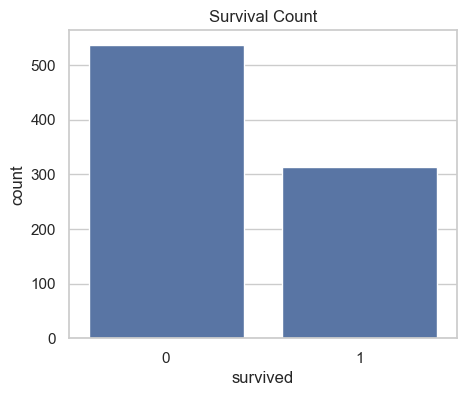

In [ ]:
#visualization
print("\n------------ STEP 10: Generating Plots ------------\n")

plt.figure(figsize=(5,4))
sns.countplot(x=df['survived'])
plt.title("Survival Count")
plt.show()

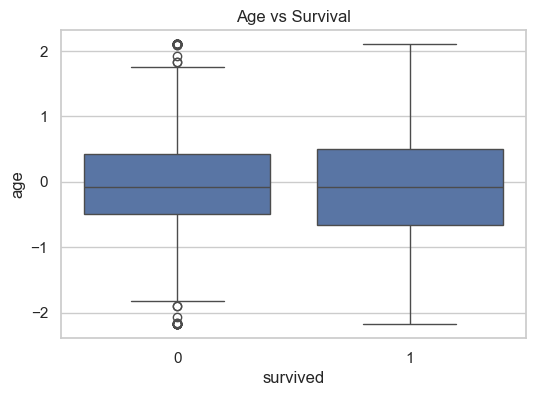

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age vs Survival")
plt.show()

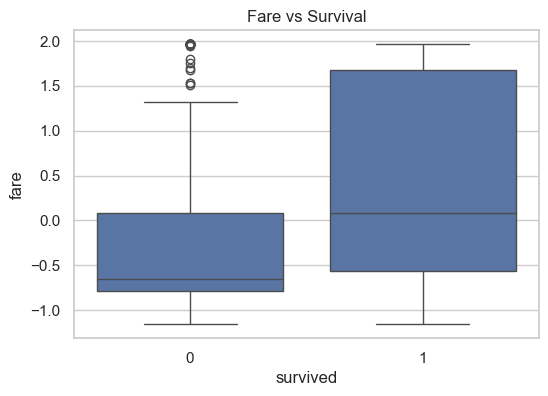

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare vs Survival")
plt.show()

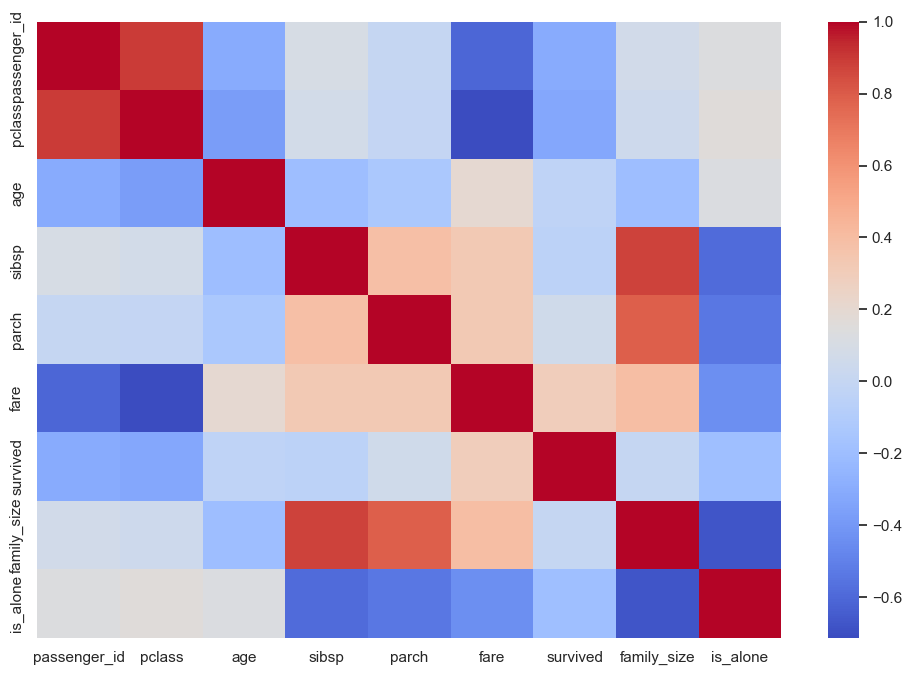

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

numeric_df = df_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.show()

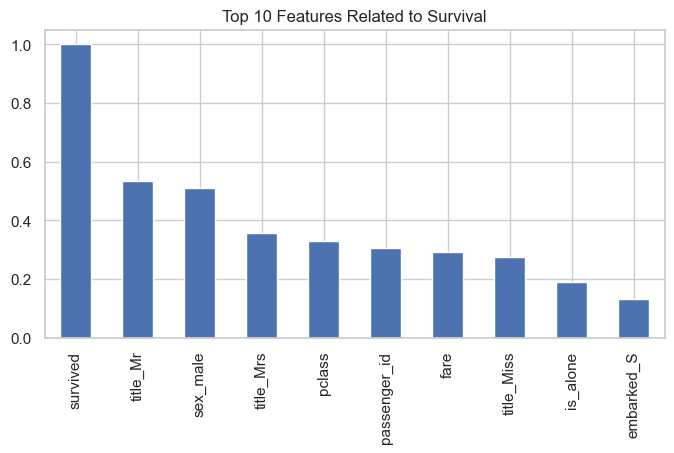

In [ ]:
top_corr = df.corr()['survived'].abs().sort_values(ascending=False)[:10]

plt.figure(figsize=(8,4))
top_corr.plot(kind='bar')
plt.title("Top 10 Features Related to Survival")
plt.show()

In [ ]:
print("\n------------ FINAL CLEANED DATASET ------------\n")
print(df.head())
print("Final Shape:", df.shape)


------------ FINAL CLEANED DATASET ------------

   passenger_id  pclass       age     sibsp     parch      fare  survived  \
0          1216       3 -0.073295 -0.469963 -0.434989 -0.787563         1   
1           699       3  0.758770 -0.469963 -0.434989 -0.743279         0   
2          1267       3  0.093118  0.429741  0.702675 -0.005159         0   
3           449       2  2.090074  0.429741  2.978005 -0.059967         1   
4           576       2  0.925183 -0.469963 -0.434989 -0.536557         0   

   family_size  is_alone  sex_male  ...  title_Master  title_Miss  title_Mlle  \
0            1         1     False  ...         False        True       False   
1            1         1      True  ...         False       False       False   
2            3         0     False  ...         False       False       False   
3            5         0     False  ...         False       False       False   
4            1         1      True  ...         False       False       False   



In [ ]:
df.to_csv("final_cleaned_dataset.csv", index=False)
